In [23]:
using Luxor
using Colors
using Plots
using IterTools
using DataFrames
using OpenStreetMapX
using LightOSM
include("kernel_density.jl")
include("distance.jl")
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_prcnt (generic function with 1 method)

In [16]:
city = "Warszawa"
admin_level = "6"
search_area = 1000
attr = :police
wilderness_distance = 300
shape = "circle"
calculate_percent = true
num_of_points = 300
distance_sectors = 200.0
scrape_config = "poi_config_test.csv"
num_of_sectors = 100

100

In [17]:
points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
                    city, #city_name
                    admin_level, #admin_level
                    search_area, #search_area
                    attr, #attr
                    wilderness_distance, #wilderness_distance
                    shape, #shape
                    calculate_percent = calculate_percent,
                    num_of_points = num_of_points,
                    scrape_config = scrape_config)
attr_heat = matrix_log_scaling(attr_heat)

#points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
#                    city, #city_name
#                    admin_level, #admin_level
#                    search_area, #search_area
#                    attr, #attr
#                    wilderness_distance, #wilderness_distance
#                    "rectangle", #shape
#                    calculate_percent = false,
#                    distance_sectors = 250,
#                    num_of_points = num_of_points,
#                    scrape_config = scrape_config)
#attr_heat = matrix_log_scaling(attr_heat)
#2+2
#
#2+2

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


100×300 Matrix{Real}:
 3.16946  3.16726  3.16508  3.16291  …  3.17829  3.17607  3.17386  3.17165
 2.97947  2.9766   2.97372  2.97083     2.99085  2.98802  2.98518  2.98233
 2.67569  2.67315  2.67065  2.66818     2.68621  2.68354  2.68089  2.67827
 2.38712  2.38625  2.38545  2.38473     2.39135  2.39019  2.38909  2.38807
 2.63947  2.63571  2.63136  2.62642     2.64873  2.64728  2.64526  2.64266
 2.59999  2.59386  2.58664  2.57835  …  2.61346  2.61176  2.60895  2.60502
 2.52789  2.51739  2.50486  2.49045     2.54726  2.54595  2.54227  2.53623
 2.19503  2.17023  2.14288  2.11359     2.22867  2.2354   2.23059  2.21597
 2.16989  2.14591  2.11855  2.08861     2.2003   2.2059   2.20192  2.18921
 1.99573  1.97998  1.96019  1.93669     2.01312  2.01597  2.01396  2.00715
 ⋮                                   ⋱                             
 0        0        0        0           0        0        0        0
 0        0        0        0           0        0        0        0
 0        0        0  

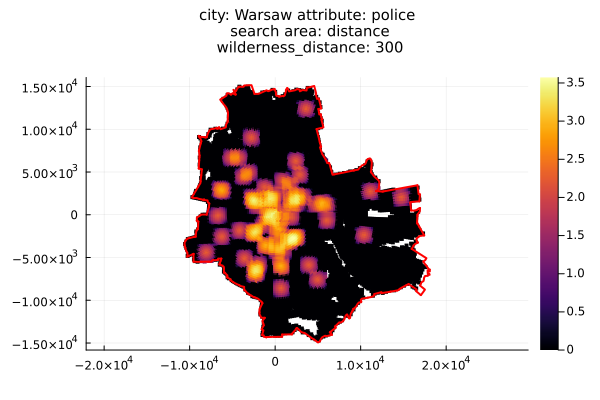

In [18]:
plot_heatmap(points_heat,attr_heat,bounds_heat,:police,"Warsaw","distance",300)

In [11]:
points_prct_Ww,attr_prct_Ww,bounds_prct_Ww = calculate_attractiveness_for_city_sectors(                                      
                                     city, #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
#                                     distance_sectors=200,
                                     scrape_config = scrape_config,
                                     calculate_attractiveness=exp_attractiveness)

attr_prct_Ww = min_max_scaling(attr_prct_Ww)

points_prct_Krk,attr_prct_Krk,bounds_prct_Krk = calculate_attractiveness_for_city_sectors(                                      
                                     "Kraków", #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
#                                     distance_sectors=200,
                                     scrape_config = scrape_config,
                                     calculate_attractiveness=exp_attractiveness)

attr_prct_Krk = min_max_scaling(attr_prct_Krk)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97
┌ Info: Read map data from cache Kraków.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


100-element Vector{Float64}:
 1.0
 0.6928455815467599
 0.6575023801232672
 0.6129740319413047
 0.5088461787792501
 0.398726804716033
 0.34008616276335496
 0.3697542349911233
 0.3495187400982971
 0.23559610804249367
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [24]:
points_dist,attr_dist,bounds_dist = calculate_attractiveness_for_city_sectors(                                      
                                     city, #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
                                     calculate_percent=false,
                                     distance_sectors=distance_sectors,
                                     num_of_sectors=num_of_sectors,
                                     scrape_config = scrape_config)

attr_dist = min_max_scaling(attr_dist)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


100-element Vector{Float64}:
 1.0
 0.8933561559416141
 0.7982270981905809
 0.6953475765755124
 0.6481256553311415
 0.6159739681053557
 0.556573032169273
 0.5225260080556885
 0.4858997447387139
 0.46837884990920364
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [25]:
plot_attractiveness_of_sectors_prcnt([attr_prct_Ww,attr_prct_Krk],["Warsaw" "Kraków"],"distance to police station")

UndefVarError: UndefVarError: `attr_prct_Ww` not defined

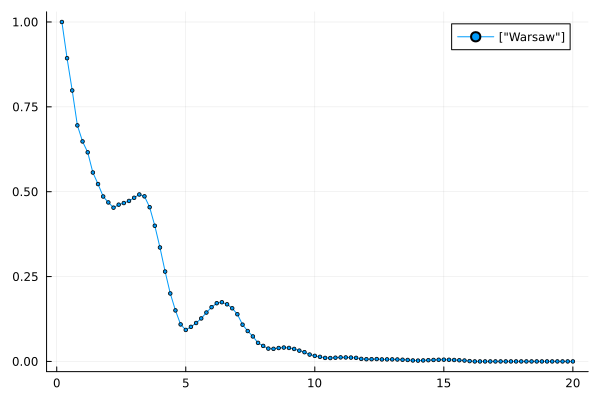

In [26]:
plot_attractiveness_of_sectors_abs(num_of_sectors,distance_sectors,
                                attr_dist,["Warsaw"])

In [3]:
city_name = "Warszawa"
admin_level = "6"
search_area = 500
wilderness_distance = 1000

df_city = get_POI("Warszawa.csv", "poi_config_test.csv")

download_boundaries_file(city_name,admin_level)
boundaries_file = "Warszawa_boundaries.osm"
city_map = create_map("$city_name.osm")
city_centre = OpenStreetMapX.center(city_map.bounds)
admin_city_centre = get_city_centre(boundaries_file)
city_boundaries = extract_points_ENU(boundaries_file,admin_city_centre)
ix_city = AttractivenessSpatIndex(df_city,get_range=a->search_area)
rectangle_boundaries = get_city_bounds(city_name,admin_level)
nodes_for_tree = change_ENU_center(city_map.nodes,city_centre, admin_city_centre)
city_tree = generate_index(wilderness_distance, nodes_for_tree)
min_point = ENU(LLA(rectangle_boundaries["minlat"],
                    rectangle_boundaries["minlon"],0),admin_city_centre)
max_point = ENU(LLA(rectangle_boundaries["maxlat"],
                    rectangle_boundaries["maxlon"],0),admin_city_centre)
dist_min = OpenStreetMapX.distance(min_point,ENU(0,0,0))
dist_max = OpenStreetMapX.distance(max_point,ENU(0,0,0))
distance_sectors = maximum([dist_min,dist_max])/100


┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


235.5967511071822

In [46]:
city_args = prepare_data_for_analyses("Warszawa","6",1000,300)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


([5243.218276193324, 5286.190912035847, 5313.125409492443, 5331.625201404574, 5371.675954435398, 5374.363063300025, 5243.218276193324, 5231.585449465192, 5231.585449465192, 5190.559286446185  …  5531.051197746041, 5515.89023048563, 5384.954359759793, 5378.363613173983, 5374.522401019059, 5374.522401019059, 5366.696934906948, 5290.505652912458, 5241.892201772674, 5374.363063300025], [8396.650289831088, 8241.414383517133, 8147.372957485509, 8083.054759576968, 7941.302803312279, 7935.475013731901, 8396.650289831088, 8438.676963845135, 8438.676963845135, 8581.653120768864  …  7079.902603749111, 7075.056422602746, 7461.897300338004, 7481.374032500712, 7494.344289980785, 7494.344289980785, 7520.1400043190915, 7747.366461631173, 7891.6247237021, 7935.475013731901], RTree{Float64, 2, SpatialElem{Float64, 2, Int64, Pair{Int64, Tuple{Float64, Float64}}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capac

In [44]:
typeof(df_city)
get_amenity_point(df_city,"restaurant")


2079×2 DataFrame
  Row │ lat      lon     
      │ Float64  Float64 
──────┼──────────────────
    1 │ 52.1769  20.9459
    2 │ 52.219   20.9743
    3 │ 52.2399  21.062
    4 │ 52.2312  21.0121
    5 │ 52.2341  21.0234
    6 │ 52.2268  21.0112
    7 │ 52.2237  21.0096
    8 │ 52.2073  21.0073
  ⋮   │    ⋮        ⋮
 2073 │ 52.202   20.8949
 2074 │ 52.1797  21.0037
 2075 │ 52.1799  21.0039
 2076 │ 52.2315  21.1052
 2077 │ 52.232   21.1059
 2078 │ 52.2161  21.0222
 2079 │ 52.3462  21.2389
        2064 rows omitted

In [14]:
num_of_sectors = 100
num_of_points = 100
distance = 1000.0

1000.0

In [48]:
generate_sectors(city_args...)

100×30 Matrix{ENU}:
 ENU(230.448, 48.9833, 0.0)  …  ENU(235.597, -5.77046e-14, 0.0)
 ENU(460.897, 97.9666, 0.0)     ENU(471.194, -1.15409e-13, 0.0)
 ENU(691.345, 146.95, 0.0)      ENU(706.79, -1.73114e-13, 0.0)
 ENU(921.794, 195.933, 0.0)     ENU(942.387, -2.30818e-13, 0.0)
 ENU(1152.24, 244.917, 0.0)     ENU(1177.98, -2.88523e-13, 0.0)
 ENU(1382.69, 293.9, 0.0)    …  ENU(1413.58, -3.46227e-13, 0.0)
 ENU(1613.14, 342.883, 0.0)     ENU(1649.18, -4.03932e-13, 0.0)
 ENU(1843.59, 391.867, 0.0)     ENU(1884.77, -4.61636e-13, 0.0)
 ENU(2074.04, 440.85, 0.0)      ENU(2120.37, -5.19341e-13, 0.0)
 ENU(2304.48, 489.833, 0.0)     ENU(2355.97, -5.77046e-13, 0.0)
 ⋮                           ⋱  
 ENU(Inf, Inf, Inf)             ENU(Inf, Inf, Inf)
 ENU(Inf, Inf, Inf)             ENU(Inf, Inf, Inf)
 ENU(Inf, Inf, Inf)             ENU(Inf, Inf, Inf)
 ENU(Inf, Inf, Inf)             ENU(Inf, Inf, Inf)
 ENU(Inf, Inf, Inf)          …  ENU(Inf, Inf, Inf)
 ENU(Inf, Inf, Inf)             ENU(Inf, Inf, Inf)
 E